In [98]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import pointbiserialr
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold,cross_val_score
from matplotlib.pyplot import xticks
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

### Data Pre Processing

In [99]:
uploaded = files.upload()

Saving Modeling Test Data.csv to Modeling Test Data (2).csv


Loading the dataset

In [100]:
data = pd.read_csv("Modeling Test Data.csv",encoding='utf-8')

Checking the shape of data

In [101]:
data.shape

(10000, 11)

Count of values in each variable in the dataset

In [102]:
data.count()

y         10000
var_1     10000
var_2     10000
var_3     10000
var_4     10000
var_5     10000
var_6     10000
var_7     10000
var_8     10000
var_9     10000
var_10    10000
dtype: int64

Since the count in each column is equal this means the data in the variables has no NULLs or NA

Exploring the features

In [103]:
data.columns

Index(['y', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10'],
      dtype='object')

In [104]:
data.head(3)

,y,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,58.891377,5285.076955,8102.610429,-142802.4627,0.731818,61045.68645,183502.7911,2418498.392,27880.60083,360626.7592,4
1,57.641838,2094.137183,7432.119245,-147434.0657,2.527586,48485.22029,232809.7287,1779351.332,32153.75776,382670.3624,5
2,53.746536,5830.245294,6613.941822,-129496.5961,2.625691,36301.74791,214837.0432,2072100.771,30642.70182,370120.6062,2


Checking the data types of each column

In [105]:
data.dtypes

y         float64
var_1     float64
var_2     float64
var_3     float64
var_4     float64
var_5     float64
var_6     float64
var_7     float64
var_8     float64
var_9     float64
var_10      int64
dtype: object

Observing all of the data types above it seems like the columns are having right data type. If it would have been string or any other format then we would have to convert its type.

Changing the postion of outcome variable. Since it was in the beginning so we are going to move to the end for the sake of simplicity.

In [106]:
outcome = data['y']
data.drop(labels=['y'],axis=1,inplace=True)
data.insert(len(data.columns),"outcomeVar",outcome)

Checking the number of NULLs in each feature column

In [107]:
data.isnull().sum(axis=0)

var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
outcomeVar    0
dtype: int64

Checking the duplicates and then dropping them

In [108]:
duplicateRows = data[data.duplicated()]
data.drop_duplicates(inplace=True)
data.shape

(10000, 11)

Since the shape of dataset found above was same as before which means no duplicate rows were found.

Finding the unique values in each column of dataset to observe if we have any continuous and categorical variables present in the dataset.

In [109]:
for feature in data.columns:

  print(feature,len(data[feature].unique().tolist()))

var_1 10000
var_2 10000
var_3 10000
var_4 10000
var_5 10000
var_6 10000
var_7 10000
var_8 10000
var_9 10000
var_10 5
outcomeVar 9791


Since, all the columns above have 10,000 unique values which gives us a sense they are continuous variables and var_10 is having 5 values which confirms it is a categorical variable.

Checking the count of NA in each column

In [110]:
data.isna().sum()

var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
outcomeVar    0
dtype: int64

Checking the number of levels in categorical variable

In [111]:
data['var_10'].unique()

array([4, 5, 2, 3, 1])

### Exploratory Data Analysis

Complete picture of features of dataset

In [112]:
data.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,outcomeVar
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,8445.963010,3450.252510,168505.815510,1.610510,73390.402240,85873.402570,1.150636e+06,22190.066240,153862.395490,3.032500,12.190351
std,3540.407793,2544.552718,154606.758685,0.799212,42488.751840,71600.020020,8.840513e+05,9835.270071,84665.459925,1.410901,16.020137
min,-5583.153749,-6338.250221,-439972.812600,-1.328607,-77050.448580,-162312.422300,-2.692945e+06,-12674.425590,-135125.465700,1.000000,-20.486397
25%,6012.666381,1689.792306,64840.482335,1.070263,44707.280773,37958.405845,5.353268e+05,15593.819880,96818.711418,2.000000,0.342919
50%,8463.373285,3430.595022,167029.781400,1.598712,73543.761555,86582.980525,1.149984e+06,22091.102400,154089.232450,3.000000,10.881019
75%,10864.843605,5165.408836,272343.174250,2.146489,102189.829900,133951.621325,1.742196e+06,28924.445840,211875.685575,4.000000,23.047831
max,23299.976630,12288.699000,857156.728100,4.639956,242913.447400,357758.526300,4.315470e+06,58807.189120,473752.797700,5.000000,94.749833


The table above shows that mean of some column is very large as compared to other. This confirms we would need to scale our data in future stage.

Separating Continuous and Discrete Variables 

In [113]:
contVar=data.drop(['var_10'],axis=1)
discVar=data[['var_10']]

Checking the class distribution of the ctaegorical variable

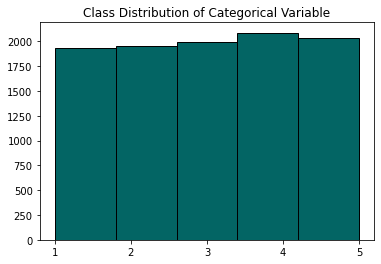

In [114]:
def classDistributionChecker(discVar):

  """This function aceepts the discrete variable and draws the class distribution"""

  for col in discVar.columns: 
    plt.title('Class Distribution of Categorical Variable')
    xticks(range(1, 6))
    plt.hist(discVar[col], bins = 5,color="#036564", edgecolor = 'black') 
    plt.show()

classDistributionChecker(discVar)

Checking the gaussian distribution in each variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


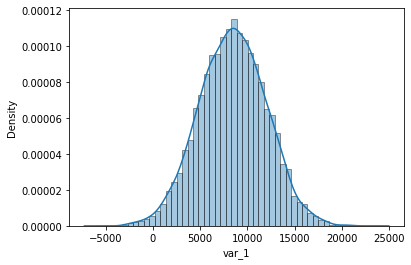

In [115]:
sns.distplot(data['var_1'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


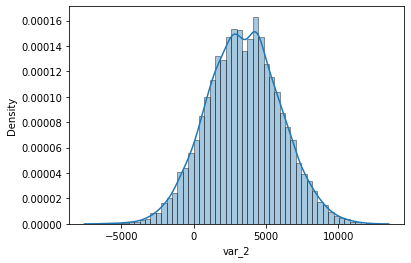

In [116]:
sns.distplot(data['var_2'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


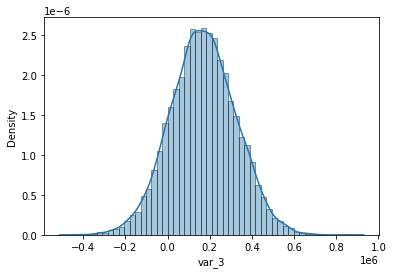

In [117]:
sns.distplot(data['var_3'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


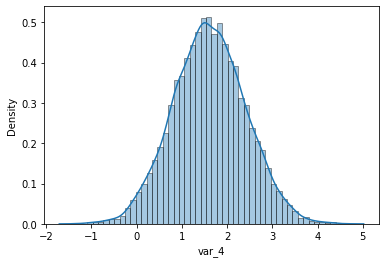

In [118]:
sns.distplot(data['var_4'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


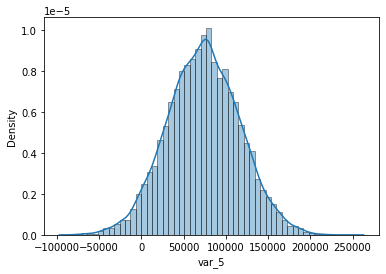

In [119]:
sns.distplot(data['var_5'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


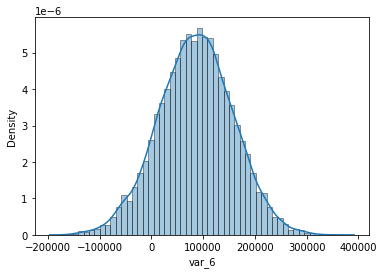

In [120]:
sns.distplot(data['var_6'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


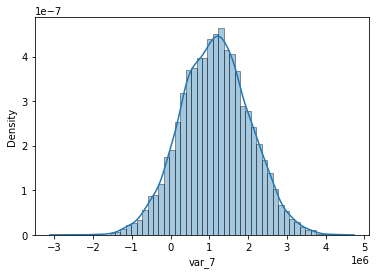

In [121]:
sns.distplot(data['var_7'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


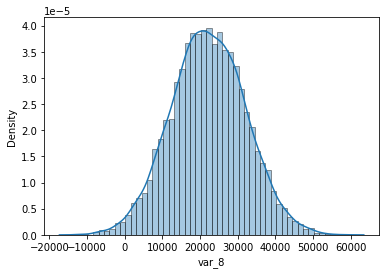

In [122]:
sns.distplot(data['var_8'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


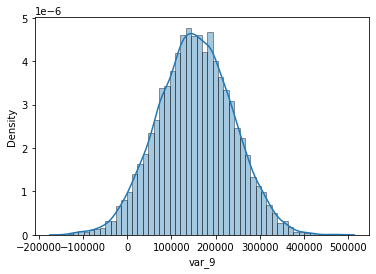

In [123]:
sns.distplot(data['var_9'],hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


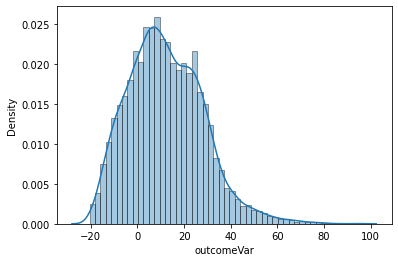

In [124]:
sns.distplot(data['outcomeVar'],hist_kws={'edgecolor':'black'})

Drawing the boxplots to observe the outliers in the data

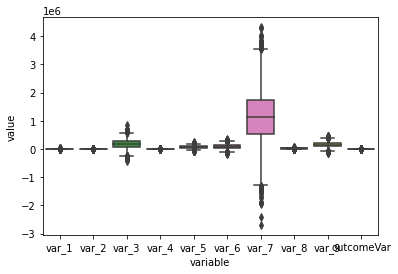

In [125]:
dataFrame=data.drop(['var_10'],axis=1)
sns.boxplot(x='variable', y="value", data=pd.melt(dataFrame))
plt.show()

From the box plot we again observe the distributions have different range and also outliers but we cannot remove the outliers because the context or background information of the variables is not provided that whether they can be removed or not thats why we would keep the outliers. 

Checking the symmetry in the data

In [126]:
def SymmetryChecker(series):

  """This function checks the symmetry of any variable"""

  print('Skewness Value: ',skew(series))  
  print('Kurtosis Value: ',kurtosis(series, fisher = True))

SymmetryChecker(data['outcomeVar'])

Skewness Value:  0.5577555665187074
Kurtosis Value:  0.5126255966683759


Since the distribution of the outcome variable seemed to be little bit unusual so we are going to verify it through checking its skewness and kurtosis value

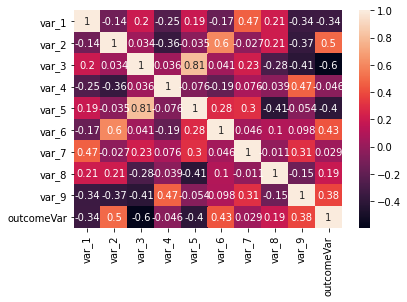

In [127]:
def associationCheckerContVar(dataframe):

  """This function draws a correlation matrix heat map of all the CONTINUOUS variables"""

  corrMatrix = dataframe.corr()
  sns.heatmap(corrMatrix, annot=True)
  plt.show()

associationCheckerContVar(data.drop(['var_10'],axis=1))

In [128]:
def associationCheckerCatVar(predictor,target):

  """This fucntion accepts categorical predictor and continuous target variable and determines correlation between them"""

  pbc = pointbiserialr(predictor, target)
  print("Correlation between Categorical Variable and Continuous Outcome Variable : ",pbc)

associationCheckerCatVar(data['var_10'],data['outcomeVar'])

Correlation between Categorical Variable and Continuous Outcome Variable :  PointbiserialrResult(correlation=-0.05250221865681431, pvalue=1.4948833975929294e-07)


In [129]:
def scaler(predictors):

  """This function accepts predictors and scales them using RobustScaler() from Sci-kit Learn. Returns scaled predictors."""

  robust_scaler = preprocessing.RobustScaler()
  scaled_predictors = robust_scaler.fit_transform(predictors)

  return scaled_predictors

In [130]:
def model_statistics(target,predictors):
  
  """This function accepts target variable and predictors and returns OLS model from stats library"""

  X_constant = sm.add_constant(predictors)
  lr_model = sm.OLS(target, predictors)
  
  lr_model = lr_model.fit()
  return lr_model

In [131]:
def test_train_splitter(predictor,target,percentage):

  """This function accepts the predictors. target variable and percentage of split. Returns splits of training and testing data"""

  X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=percentage/100, random_state=42)

  return X_train, X_test, y_train, y_test

In [132]:
def linearity_test(model, y):
 
  """This function accepts the model object, target variable and draws two graphs (1) Observed Values vs Predicted Values (2) Predicted vs Residuals"""

  fitted_vals = model.predict()
  resids = model.resid

  fig, ax = plt.subplots(1,2)
    
  sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
  ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
  ax[0].set(xlabel='Predicted', ylabel='Observed')

  sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
  ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
  ax[1].set(xlabel='Predicted', ylabel='Residuals')

Separating predictors and outcome variable

In [133]:
def meanResidualsChecker(model):

  """This function accepts the model object and returns the mean of residuals of the model"""
  
  meanResidVal=model.resid.mean()
  return meanResidVal

In [134]:
def varianceInflationChecker(predictors): 

  """ This function accepts predictors and determines their VIF value. Return a datframe of VIF values of features """
  
  vif = pd.DataFrame()
  vif["Features"] = predictors.columns
  vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
  
  return vif

In [135]:
def homoscedasticity_test(model):
    """
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests."""
    
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

In [136]:
def normality_of_residuals_test(model):
    
    """"This function accepts model object and draws normal QQ-plot of the residuals"""
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

In [137]:
def variance_checker(predictor):
  
  """This function accepts the predictors and display the variance in the features"""

  print("Variance in the features")
  print(predictor.apply(np.var, axis=0))

In [138]:
def model_trainer(model,X_train,y_train):
  
  """This funtion accepts model object, training data excluding outcome variable and training data of outcome variable. Fits the training data and returns fitted values"""

  fittedValues=model.fit(X_train, y_train)
  return fittedValues

In [139]:
 def model_predictions(model,X_train,X_test):

  """This function accepts model object, training data excluding outcome variable and test data excluding outcome variable. Performs prediction and returns train and test predictions on 
  outcome variable"""

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
    
  return y_train_pred,y_test_pred

In [140]:
def cross_validation(model,fold,predictors,target):

  """This function accepts model object, number of folds to be performed on cross validation, predictors and target variable. Performs Cross Validation and displays the mean result of
  cross validation score."""

  kfold = KFold(fold, True, 1)
  kfold_results=model_selection.cross_val_score(model, predictors,target, cv=kfold)
  print("Coefficient of Determination of Mean Cross Validation: %.2f%%" % (kfold_results.mean()*100.0)) 

In [141]:
def model_weights_graph(model):

  plt.figure(figsize=(10,6))
  plt.plot(range(len(model.coef_[0])),model.coef_[0])
  plt.axhline(0, color='r', linestyle='solid')
  plt.xticks(range(len(feature_names)),feature_names,rotation=50)
  plt.title("Coefficients of Model")
  plt.ylabel("Coefficients")
  plt.xlabel("Features")
  plt.show()

In [142]:
def model_weight_display(model):
  
  print(model.coef_[0])

In [143]:
def regPerformanceMetrics(model,y_train,y_train_pred,y_test,y_test_pred):

  """This function displays performance metrics of regression model. Accepts model object, training set of outcome variable, predictions made for outcome variable, testing set of outcome variable
  and predictions made on test set of outcome variable"""

  print('Root Mean Squared Error of Training Data: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
  print('Root Mean Squared Error of Test Data: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))
  print('--------------------------------------------------------------')
  print('Mean Squared Error of Training Data: ',mean_squared_error(y_train,y_train_pred))
  print('Mean Squared Error of Test Data: ',mean_squared_error(y_test,y_test_pred))
  print('--------------------------------------------------------------')
  print('Mean Absolute Error of Training Data: ',mean_absolute_error(y_train,y_train_pred))
  print('Mean Absolute Error of Test Data: ',mean_absolute_error(y_test,y_test_pred))
  print('--------------------------------------------------------------')
  print('R-squared of Training Data: ',r2_score(y_train,y_train_pred)*100)
  print('R-squared of Test Data: ',r2_score(y_test,y_test_pred)*100)

In [144]:
predictors = data.drop(['outcomeVar'],axis=1) 
target = data['outcomeVar']

Label Encoding of the categorical variable since this variable has only 5 discrete levels

In [145]:
names=[]
dummies = pd.get_dummies(data['var_10'])

for col in dummies.columns:
  names.append("var_10_"+str(col)+"_Yes")

dummies.columns = names
predictors=predictors.join(dummies)
predictors=predictors.drop('var_10',axis=1)

### Building a Linear Regression Model taking all the predictors into account

Linear Regression was chosen because Outcome Variable we are trying to predict is continuous

Before building the Linear Regression model we should be checking if all the assumptions of Linear Regression model are being satisfied or not:

1. Linearity Test
2. Mean of the residuals to be zero
3. No Multi Collinearity (For this we will be checking through Variance Inflation Factor)
4. Homoscedasticity of Residuals
5. Normality of Residuals

Checking all the assumptions one by one

In [146]:
summary_model = model_statistics(target,predictors)

1. Checking Linearity

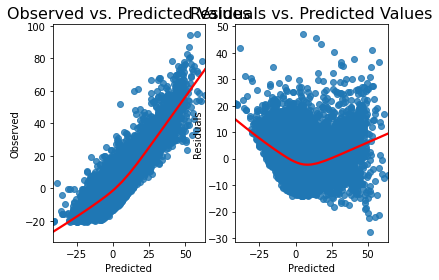

In [147]:
linearity_test(summary_model,target)

2. Checking Mean of Residuals whether it is zero or not

In [148]:
meanResidualsChecker(summary_model)

-2.0943364376080352e-12

3. No Multi Collinearity

In [149]:
varianceInflationChecker(predictors)

,Features,VIF Factor
0,var_1,5.826514
1,var_2,4.501810
2,var_3,19.656560
3,var_4,3.148125
4,var_5,13.313758
5,var_6,3.107552
6,var_7,6.024457
7,var_8,1.643089
8,var_9,17.079326
9,var_10_1_Yes,19.829553


4. Homoscedasticity of Residuals

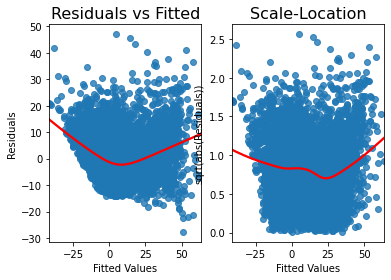

In [150]:
homoscedasticity_test(summary_model)

5. Normality of Residuals

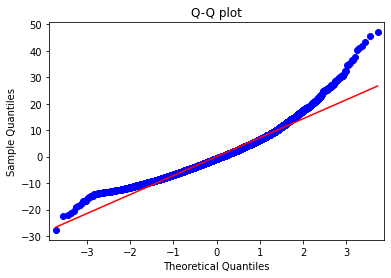

In [151]:
normality_of_residuals_test(summary_model)

Scaling the predictors through RobustScaler() from Scikit Learn since we have outliers in  data and splitting our data into train and test set

In [152]:
predictors=scaler(predictors)
X_train, X_test, y_train, y_test = test_train_splitter(predictors,target,33)

Creating a Linear Regression model and fitting the data

In [153]:
reg = LinearRegression(fit_intercept=True)
trainedModel = model_trainer(reg,X_train,y_train)

Making the predictions from the model

In [154]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)
cross_validation(reg,3,predictors,target)

Coefficient of Determination of Mean Cross Validation: 79.84%


Goodness of fit (Evaluating Performance)

In [155]:
regPerformanceMetrics(reg,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  7.2196067155074
Root Mean Squared Error of Test Data:  7.108496789099119
--------------------------------------------------------------
Mean Squared Error of Training Data:  52.12272112659955
Mean Squared Error of Test Data:  50.53072660063249
--------------------------------------------------------------
Mean Absolute Error of Training Data:  5.516693344847994
Mean Absolute Error of Test Data:  5.451984784905925
--------------------------------------------------------------
R-squared of Training Data:  79.58804337620643
R-squared of Test Data:  80.4892966004799


### Building a Linear Regression model but taking few features

By looking at the correlation matrix and the results from OLS model, I found that the p-value of few variables were not significant and also by looking at the correlation matrix I observed that there exist a multi collinearity between the variables. So, in this case I dropped few variables and took the approach to go with the few variables. Variables taken below have significant P-value and they do not have correlation between them. 

In [156]:
predictors=data[['var_2','var_5','var_7','var_9']]

Scaling the predictors

In [157]:
predictors=scaler(predictors)

From this point we need to again check the assumptions before doing Linear Regression

In [158]:
summary_model = model_statistics(target,predictors)

1. Linearity Test

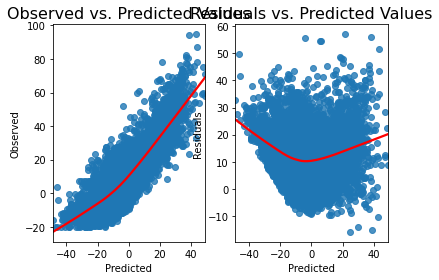

In [159]:
linearity_test(summary_model,target)

2. Checking Mean of Residuals whether it is zero or not

In [160]:
meanResidualsChecker(summary_model)

12.109207719079992

3. Homoscedasticity of Residuals

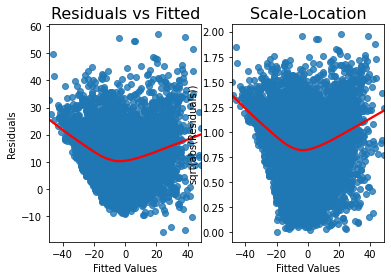

In [161]:
homoscedasticity_test(summary_model)

4. Normality of Residuals

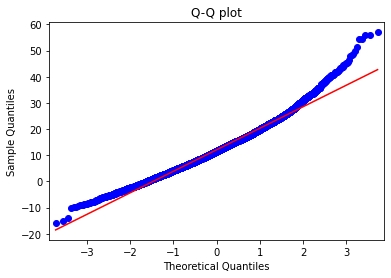

In [162]:
normality_of_residuals_test(summary_model)

As all the assumtpions have been checked once again, now we will continue to model building part

Splitting the data into test and train split

In [163]:
X_train, X_test, y_train, y_test = test_train_splitter(predictors,target,33)

Training the model

In [164]:
trainedModel = model_trainer(reg,X_train,y_train)

Making the predictions

In [165]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)

Cross validating

In [166]:
cross_validation(reg,3,predictors,target)

Coefficient of Determination of Mean Cross Validation: 73.57%


Evaluating Performance

In [167]:
regPerformanceMetrics(reg,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  8.310439425847377
Root Mean Squared Error of Test Data:  8.07234463714382
--------------------------------------------------------------
Mean Squared Error of Training Data:  69.06340345067848
Mean Squared Error of Test Data:  65.16274794082457
--------------------------------------------------------------
Mean Absolute Error of Training Data:  6.48427965489578
Mean Absolute Error of Test Data:  6.34414293602026
--------------------------------------------------------------
R-squared of Training Data:  72.95384498244492
R-squared of Test Data:  74.83964444407567


Even with taking few predictors which didn't have multi collinearity didn't increase the accuracy. So, this motivates us to move towards Regularisation Techniques

Building Ridge Regression Model taking all the predictors so that the model can do the feature selection on its own

In [168]:
predictors = data.drop(['outcomeVar'],axis=1)
predictors=scaler(predictors)

X_train, X_test, y_train, y_test = test_train_splitter(predictors,target,25)

Taking potential values of alpha

In [169]:
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

In [170]:
ridge= GridSearchCV(Ridge(), alpha_values, scoring='r2', cv=10 )

In [171]:
trainedModel = model_trainer(ridge,X_train,y_train)
print("Best Alpha Value: ",trainedModel.best_params_)
print("Best Score: ",trainedModel.best_score_)

Best Alpha Value:  {'alpha': 3}
Best Score:  0.7701014827924457


Making the predictions from Ridge Model

In [172]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)

Evaluating the performance

In [173]:
print("Coefficient of Determination: ",round(ridge.score(X_test,y_test)*100,2),'%')

Coefficient of Determination:  77.66 %


In [174]:
regPerformanceMetrics(ridge,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  7.676174143811466
Root Mean Squared Error of Test Data:  7.498474447663537
--------------------------------------------------------------
Mean Squared Error of Training Data:  58.92364948611969
Mean Squared Error of Test Data:  56.22711904226299
--------------------------------------------------------------
Mean Absolute Error of Training Data:  5.907940967243395
Mean Absolute Error of Test Data:  5.847705022787636
--------------------------------------------------------------
R-squared of Training Data:  77.18267889283975
R-squared of Test Data:  77.65731276530778


Building a Lasso Model

In [175]:
lasso= GridSearchCV(Lasso(), alpha_values, scoring='r2', cv=10 )

In [176]:
trainedModel = model_trainer(lasso,X_train,y_train)
print("Best Alpha Value: ",trainedModel.best_params_)
print("Best Score: ",trainedModel.best_score_)

Best Alpha Value:  {'alpha': 0.03}
Best Score:  0.7702704992203527


Making the Predictions from the model

In [177]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)

Evaluating the model

In [178]:
print("Coefficient of Determination: ",round(lasso.score(X_test,y_test)*100,2),'%')

Coefficient of Determination:  77.64 %


In [179]:
regPerformanceMetrics(lasso,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  7.677239691044347
Root Mean Squared Error of Test Data:  7.501630474063678
--------------------------------------------------------------
Mean Squared Error of Training Data:  58.9400092737467
Mean Squared Error of Test Data:  56.274459769400835
--------------------------------------------------------------
Mean Absolute Error of Training Data:  5.908843864402368
Mean Absolute Error of Test Data:  5.851180045774748
--------------------------------------------------------------
R-squared of Training Data:  77.17634380445358
R-squared of Test Data:  77.63850121888818


We observed that even the Regularisation Techniques did not increase the performance to generalise the unseen data. Potential reason: They are also the family of linear models. 

Changing the flexibility of the underlying curve to see the difference

Taking the polynomial features of all the variables

In [180]:
predictors=data.drop(['outcomeVar'],axis=1)
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

Training the model

In [181]:
trainedModel = model_trainer(polyreg,X_train,y_train)

Making thge predictions

In [182]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)

Cross Validating and Evaluating Performance

In [183]:
cross_validation(polyreg,3,predictors,target)

Coefficient of Determination of Mean Cross Validation: 88.14%


In [184]:
regPerformanceMetrics(polyreg,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  5.447807624691427
Root Mean Squared Error of Test Data:  5.566251070138338
--------------------------------------------------------------
Mean Squared Error of Training Data:  29.67860791564604
Mean Squared Error of Test Data:  30.983150975816198
--------------------------------------------------------------
Mean Absolute Error of Training Data:  4.328995530006633
Mean Absolute Error of Test Data:  4.354934067879665
--------------------------------------------------------------
R-squared of Training Data:  88.5073933347539
R-squared of Test Data:  87.68838127243218


From seeing the performance metrics we can see that the performance significantly increased when we changed the flexibility of the curve. This might have lowered the bias we were having in the previous models.

### Next Step: Apply Ensembling Techniques



Building a Gradient Boost Model

In [185]:
grad_boost = GradientBoostingRegressor()

Training the model

In [186]:
trainedModel = model_trainer(grad_boost,X_train,y_train)

Cross validating and making the predictions

In [187]:
y_train_pred,y_test_pred = model_predictions(trainedModel,X_train,X_test)

In [188]:
cross_validation(grad_boost,3,predictors,target)

Coefficient of Determination of Mean Cross Validation: 99.60%


Evaluating Performance of the model

In [189]:
regPerformanceMetrics(grad_boost,y_train,y_train_pred,y_test,y_test_pred)

Root Mean Squared Error of Training Data:  0.7985875305698049
Root Mean Squared Error of Test Data:  1.006812042081691
--------------------------------------------------------------
Mean Squared Error of Training Data:  0.6377420439815792
Mean Squared Error of Test Data:  1.013670488080705
--------------------------------------------------------------
Mean Absolute Error of Training Data:  0.5871593391429993
Mean Absolute Error of Test Data:  0.6887991026239833
--------------------------------------------------------------
R-squared of Training Data:  99.75304372475279
R-squared of Test Data:  99.5972028611816


Since we got reasonable performance so there would be no need to tune the hyperparamters of this model.

### Future Step:  Building Stack Regressor